In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import ast

Plots zur Analyse der Sozioökonomischen Indikatoren
----------------------------------------------------------------------

In [70]:
sozStats = pd.read_csv('./ergebnisse/SozStats_Pro_Haltestelle.csv')
sozStats = sozStats.set_index('Indikatoren')

In [71]:
def plot_barchart(df, index, save_name=None, normieren=False, plot_title=None):
    """
    Plottet ein Bar Chart für den angegebenen Index eines DataFrames und speichert optional das Bild als PNG.

    Args:
    df (DataFrame): Das Eingabedatenframe mit den Sozioökonomischen Indikatoren und den Einzugsbereichen.
    index (str): Der Name des Index, der geplottet werden soll.
    save_name (str, optional): Der Name, unter dem das Bild gespeichert werden soll (300 dpi). Standard ist None.
    normieren (bool, optional): Wenn True, werden die Werte bezüglich der zweiten Spalte (Hamburg gesamt) normalisiert. Standard ist False.
    plot_title (str, optional): Der Titel des Plots. Standard ist None, was einen generischen Titel verwendet.

    Output:
    - Zeigt den Plot an.
    - Speichert das Bild als PNG, wenn `save_name` angegeben ist.
    """
    
    # Hole die Werte des angegebenen Indexes
    values = df.loc[index]

    # Wenn normieren=True, subtrahiere den Wert aus der zweiten Spalte (Hamburg gesamt)
    if normieren:
        hamburg_value = values['Hamburg total']  # Ändere dies, um direkt auf die Spalte zuzugreifen
        values = (values - hamburg_value) / hamburg_value * 100  # Berechnung der prozentualen Abweichung
        values = values[values.index != 'Hamburg total']  # Entferne die Hamburg gesamt Säule

        # Farben definieren: Erster Balken hebt sich ab
        colors = ['#ce1141'] + ['#13274f'] * (len(values) - 1)
        
        if plot_title is None:
            plot_title = f'Percentage deviation of {index}'

    else:
        # Farben definieren: Erste zwei Balken heben sich ab
        colors = ['#e7a801', '#ce1141'] + ['#13274f'] * (len(values) - 2)

        if plot_title is None:
            plot_title = f'Bar Chart of {index}'

    # Erstelle den Bar Chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(values.index, values, color=colors)

    # Labels und Titel
    plt.ylabel('Deviation (%) from Hamburg mean' if normieren else f'Value of {index}')
    plt.title(plot_title)
    
    # Zeige den Plot
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Catchment area')
    plt.tight_layout()

    # Optional: Speichere das Bild als PNG
    if save_name:
        plt.savefig(f'./plots/{save_name}.png', dpi=300)
        print(f"Bild gespeichert als {save_name}.png mit 300 dpi.")

        plt.show()


In [72]:
# Indexe, die für das Plotten zur Auswahl stehen
[i for i in sozStats.index]

['bev_u18_proz',
 'bev_18_bis_u30_proz',
 'bev_30_bis_u56_proz',
 'bev_ab56_proz',
 'bev_ab65_proz',
 'bev_auslaender_proz',
 'bev_migrationshintergrund_proz',
 'bev_u18_migrationshintergrund_proz',
 'bev_ab65_migrationshintergrund_proz',
 'wohn_avg_wohnflaeche_in_qm_pro_einw',
 'inf_schueler_in_gymn_an_allen_sekundarstufe_1_proz',
 'arb_arbeitslose_ingesamt_proz',
 'ver_private_pkw_je_1000_ew_anz',
 'hau_haushaltgroesse_avg',
 'hau_einpersonenhaushalte_proz',
 'hau_haushalte_mit_kindern_proz',
 'hau_alleinerziehende_proz',
 'flaeche_einw_pro_ha',
 'wohn_ant_sozialwohnungen_an_allen_wohnungen',
 'inf_niedergelassene_aerzte_anz',
 'wohn_avg_immobilienpreis_eigt_wohnung_euro_pro_qm']

Bild gespeichert als hau_haushalte_mit_kindern_proz.png mit 300 dpi.


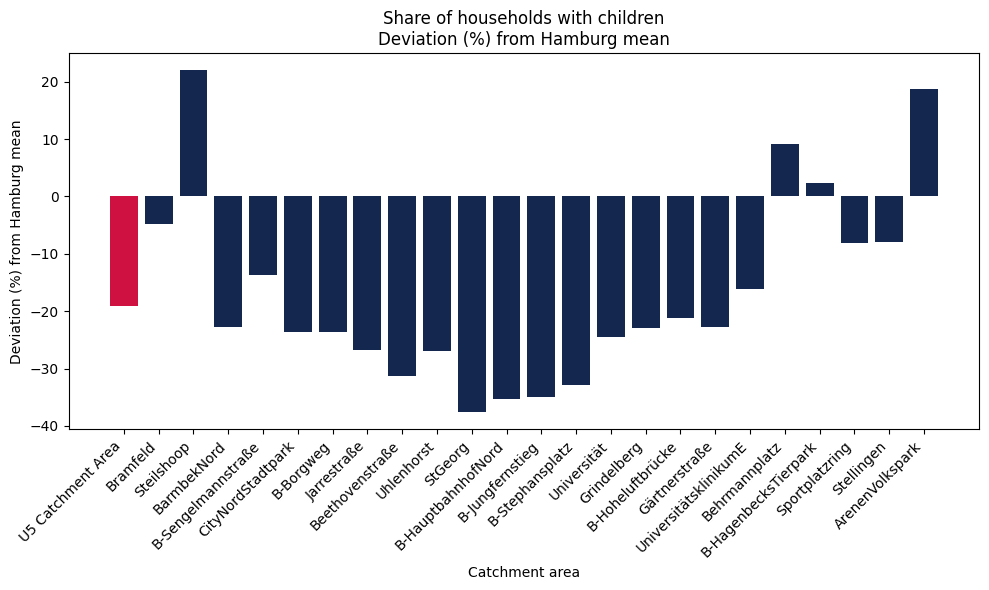

In [79]:
plot_barchart(sozStats, 'hau_haushalte_mit_kindern_proz', normieren=True, 
              plot_title = 'Share of households with children\nDeviation (%) from Hamburg mean', 
              save_name = 'hau_haushalte_mit_kindern_proz')

Plots zur Analyse der Scores
----------------------------------------------------------------------

In [65]:
scoreStats = pd.read_csv('./ergebnisse/ScoreStats_Pro_Haltestelle.csv')
scoreStats = scoreStats.set_index('stop area').T
[i for i in scoreStats.index]

['all trips mean score base case',
 'all trips mean score scenario',
 'all trips abs difference',
 'all trips rel difference',
 'u5 trips mean score base case',
 'u5 trips mean score scenario',
 'u5 trips abs difference',
 'u5 trips rel difference']

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_bar_chart_multiple_indices(df, indices, save_name=None, plot_title=None):
    """
    Plottet ein Bar Chart für mehrere Indizes eines DataFrames und speichert optional das Bild als PNG.

    Args:
    df (DataFrame): Das Eingabedatenframe mit den Sozioökonomischen Indikatoren und den Einzugsbereichen.
    indices (list): Eine Liste von Indizes, die geplottet werden sollen.
    save_name (str, optional): Der Name, unter dem das Bild gespeichert werden soll (300 dpi). Standard ist None.
    plot_title (str, optional): Der Titel des Plots. Standard ist None, was einen generischen Titel verwendet.

    Output:
    - Zeigt den Plot an.
    - Speichert das Bild als PNG, wenn `save_name` angegeben ist.
    """
    
    # Erstelle ein leeres DataFrame für die Werte der angegebenen Indizes
    values_to_plot = df.loc[indices]
    
    # Transponiere das DataFrame, um die Indizes auf die x-Achse zu setzen
    values_to_plot = values_to_plot.T

    # Farben
    colors = ['#ce1141', '#13274f']
    
    # Plotte die Werte für jeden Index
    values_to_plot.plot(kind='bar', figsize=(12, 6), color=colors)

    # Labels und Titel
    plt.ylabel('Values')
    if plot_title is None:
        plot_title = 'Bar Chart fpr different indeces'
    plt.title(plot_title)
    
    # Zeige den Plot
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(title='Indices', loc='upper right')  # Legende außerhalb des Plots

    # Optional: Speichere das Bild als PNG
    if save_name:
        plt.savefig(f'./plots/{save_name}.png', dpi=300)
        print(f"Bild gespeichert als {save_name}.png mit 300 dpi.")

# Beispielaufruf (stellen Sie sicher, dass df in Ihrem Code vorhanden ist):
# plot_bar_chart_multiple_indices(df, ['all trips mean score base case', 'u5 trips mean score base case'], save_name='comparison_bar_chart')


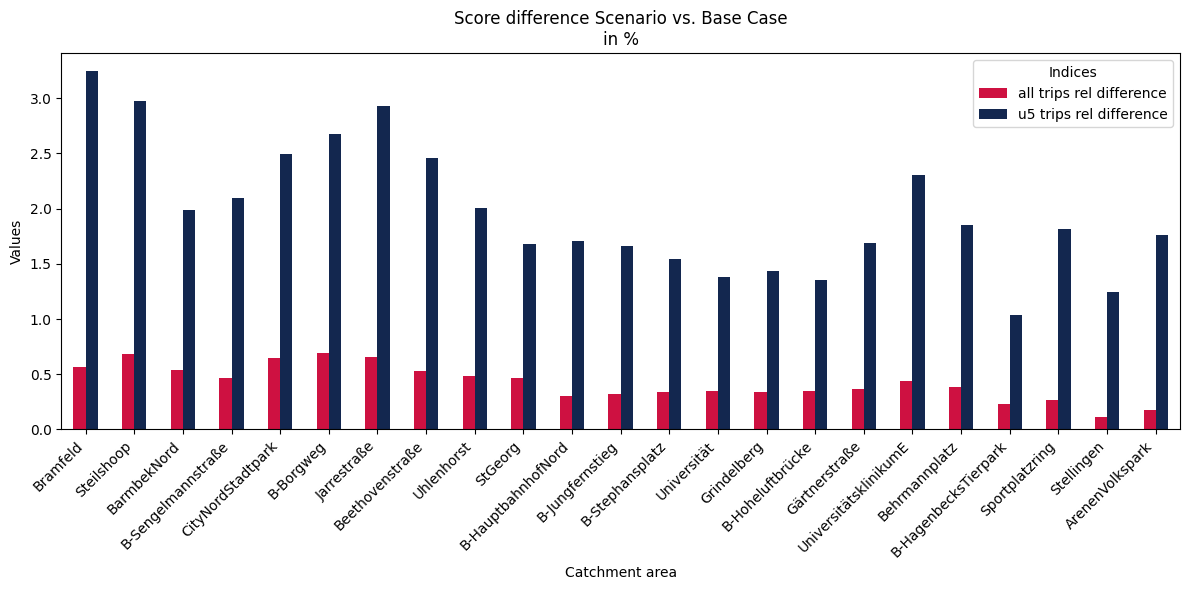

In [200]:
plot_bar_chart_multiple_indices(scoreStats, ['all trips rel difference', 'u5 trips rel difference'], plot_title='Score difference Scenario vs. Base Case\nin %')
plt.xlabel('Catchment area')
plt.savefig('./plots/ScoreDiff_in_pr.png')
plt.show()


Plots zur Analyse des Modal Shares
------------------


In [6]:
modal_split_stats = pd.read_csv('./ergebnisse/MSplitStats_Pro_Haltestelle.csv')

for i in modal_split_stats.columns[1:]:

    modal_split_stats[i] = modal_split_stats[i].apply(ast.literal_eval)

modal_split_stats = modal_split_stats.set_index('Haltestelle_area')

In [64]:
def plot_mode_change(df, mode):
    """
    Erstellt ein Balkendiagramm, das die Änderung des Anteils eines bestimmten Verkehrsmittels an allen Haltestellen zeigt.
    
    Argumente:
    df (pandas.DataFrame): Das Dataframe mit den Vergleichsergebnissen.
    mode (str): Der Name des Verkehrsmittels, für das die Änderung dargestellt werden soll.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Extrahiere die Änderung des gewünschten Verkehrsmittels für alle Haltestellen
    mode_changes = df['Änderung'].apply(lambda d: d.get(mode, 0))
    
    # Erstelle das Balkendiagramm
    sns.barplot(x=df.index, y=mode_changes * 100, ax=ax, color = '#13274f')
    ax.set_title(f"Change in the modal share of '{mode}' per catchment area\n Scenario relative to Base Case")
    ax.set_xlabel("Catchment area")
    ax.set_ylabel("Change in modal share [%]")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

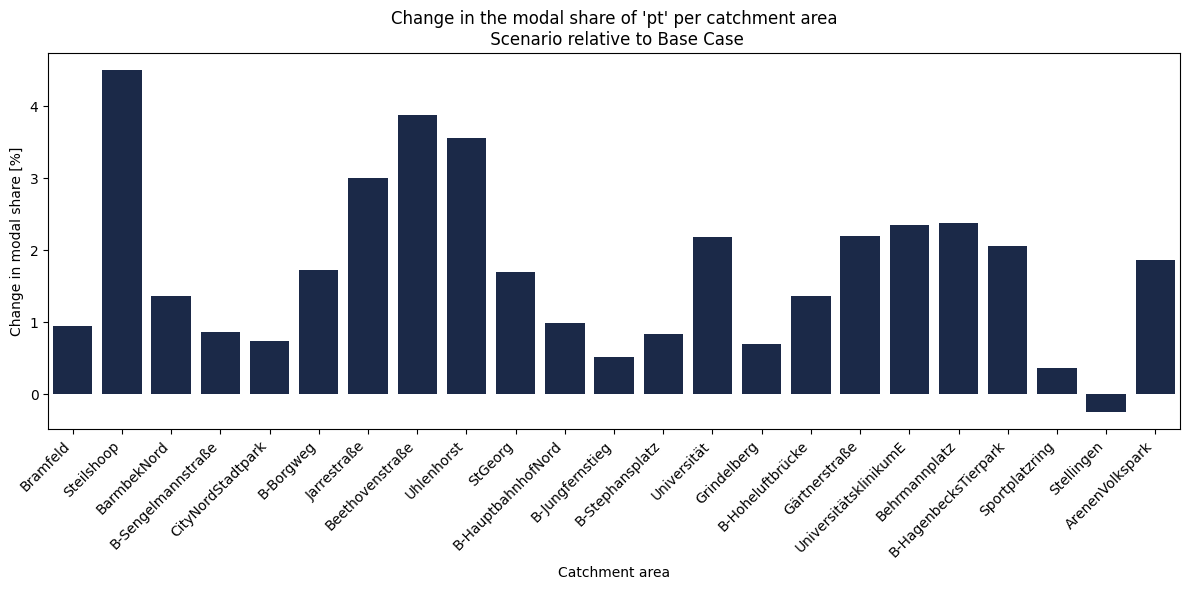

In [69]:
plot_mode_change(modal_split_stats, 'pt')
plt.savefig('./plots/aenderung_pt_modal_split.png')
plt.show()

-----------------------------------------

Travel Time Plots
--


_______________________________________________

In [30]:
travTime_stats = pd.read_csv('./ergebnisse/TravTimeStats_Pro_Haltestelle.csv')

In [32]:
travTime_stats_u5 =  pd.read_csv('./ergebnisse/TravTimeStats_u5_Pro_Haltestelle.csv')

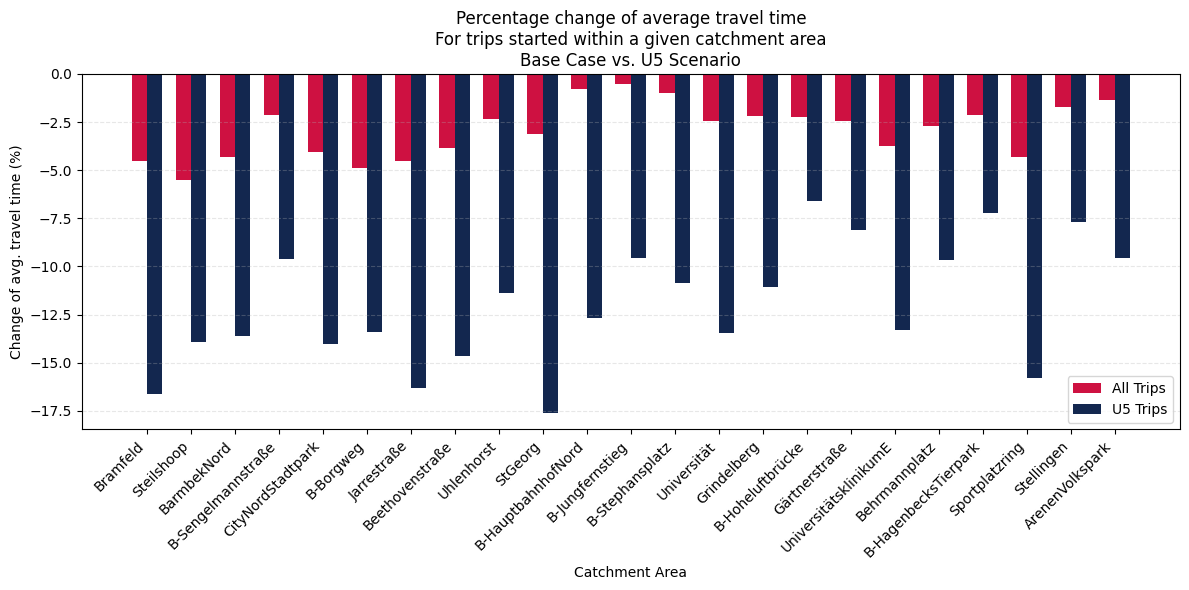

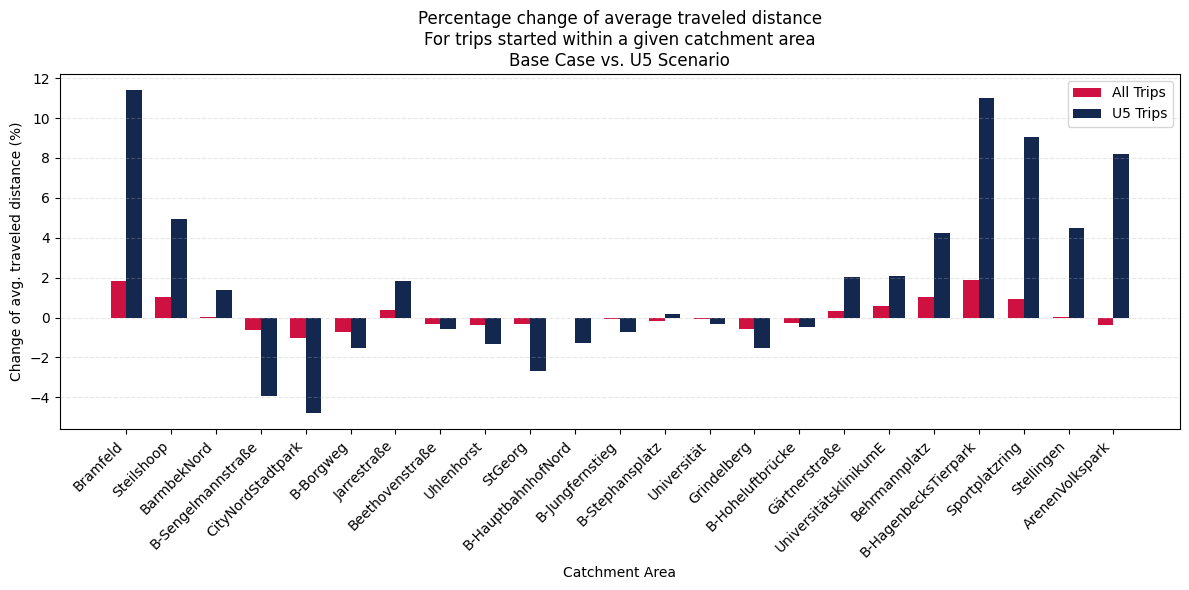

In [55]:
# Define variables for better customization
width = 0.35  # width of the bars
color2 = '#13274f'  # color for all trips
color1 = '#ce1141'  # color for U5 trips

# Define variables for the two DataFrames
df_all_trips = travTime_stats  # assuming this is your DataFrame for all trips
df_u5_trips = travTime_stats_u5  # assuming this is your DataFrame for U5 trips

# Variablen für Achsenbeschriftungen
xlabel = 'Catchment Area'
ylabel_time = 'Change of avg. travel time (%)'
ylabel_distance = 'Change of avg. traveled distance (%)'
title_time = 'Percentage change of average travel time\nFor trips started within a given catchment area\nBase Case vs. U5 Scenario'
title_distance = 'Percentage change of average traveled distance\nFor trips started within a given catchment area\nBase Case vs. U5 Scenario'

# Barbreite und Positionen definieren
index = np.arange(len(df_all_trips['Haltestelle_area']))

# Plot für Reisezeit-Veränderungen
fig, ax1 = plt.subplots(figsize=(12, 6))

bars1 = ax1.bar(index - width/2, df_all_trips['percent_change_trav_time'], width, color=color1, label='All Trips')
bars2 = ax1.bar(index + width/2, df_u5_trips['percent_change_trav_time'], width, color=color2, label='U5 Trips')

# Achsenbeschriftungen und Titel für Reisezeit-Plot
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel_time)
ax1.set_title(title_time)
ax1.set_xticks(index)
ax1.set_xticklabels(df_all_trips['Haltestelle_area'], rotation=45, ha='right')
ax1.legend()

ax1.yaxis.grid(True, linestyle='--', alpha=0.3)


# Layout anpassen und Diagramm anzeigen
plt.tight_layout()
plt.savefig('./plots/Trav_times_u5_comparison.png')
plt.show()

# Plot für Distanz-Veränderungen
fig, ax2 = plt.subplots(figsize=(12, 6))

bars3 = ax2.bar(index - width/2, df_all_trips['percent_change_traveled_distance'], width, color=color1, label='All Trips')
bars4 = ax2.bar(index + width/2, df_u5_trips['percent_change_traveled_distance'], width, color=color2, label='U5 Trips')

# Achsenbeschriftungen und Titel für Distanz-Plot
ax2.set_xlabel(xlabel)
ax2.set_ylabel(ylabel_distance)
ax2.set_title(title_distance)
ax2.set_xticks(index)
ax2.set_xticklabels(df_all_trips['Haltestelle_area'], rotation=45, ha='right')
ax2.legend()
        
ax2.yaxis.grid(True, linestyle='--', alpha=0.3)

# Layout anpassen und Diagramm anzeigen
plt.tight_layout()
plt.savefig('./plots/Trav_distance_u5_comparison.png')
plt.show()